In [1]:
import numpy as np
from numpy.random import randn
from scipy.stats import norm     # normal cdf

import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from sklearn import datasets

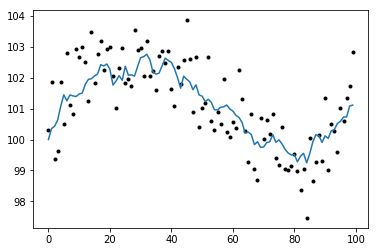

In [2]:
# Generate synthetic data
np.random.seed(0)
n = 100
a  = np.zeros(n) # create an array of 0's of length n
s = .2            # controls how fast true mean moves
a[0] = 100
for i in range(1,n):
    a[i] = a[i-1] + s*randn()
noise_std = .8
x = a + noise_std*randn(n)

plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)

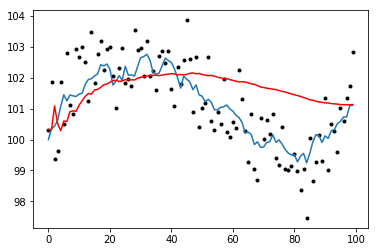

In [3]:
# fit a constant mean model 
ahat = np.zeros(len(x))
ahat[0] = x[0]
for i in range(1,n):
    ahat[i] = ahat[i-1] + 1/i*(x[i-1] - ahat[i-1])
    
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), ahat, color='red')

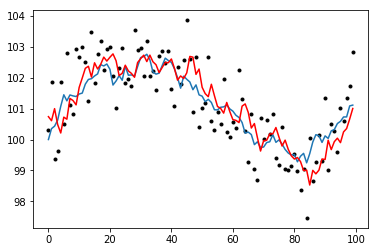

In [4]:
# fit = SimpleExpSmoothing(x).fit(smoothing_level=0.5, optimized=False) # choose smoothing level explicitly
fit = SimpleExpSmoothing(x).fit() # choose smoothing level to best fit data
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

* Change noise std and s and see how it affects x.
* Change the alpha parameter to see how it affects the red line, and to make the red line track x.
* Remove the arguments to fit() to let SimpleExpSmoothing fit alpha for you.
* How does the optimal value of alpha change as you change noise std and s?

In [5]:
# fit.params shows the chosen values for all parameters 
fit.params

{'smoothing_level': 0.31305154465318474,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 100.74174724948031,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

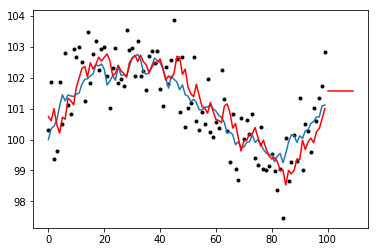

In [6]:
# forecast, too!
xhat = fit.fittedvalues
l = 10
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

# Holt's method: add a trend

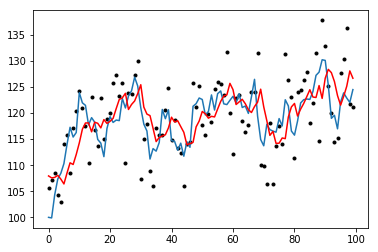

In [7]:
n = 100
a = np.zeros(n)
b = np.zeros(n)
a[0] = 100 # initial level
b[0] = 1 # initial trend

for i in range(1,n):
    b[i] = b[i-1] + 0.1*randn()      # trend changes slowly
    a[i] = a[i-1] + b[i-1] + 3*randn() # level moves with the trend + extra random movement

# We observe the level + extra noise
x = a + 5*randn(n) 

# fit the model
# fit = Holt(x).fit(smoothing_level=0.1,smoothing_slope=.1,optimized=False)
fit = Holt(x).fit() # optimize over the parameters
xhat = fit.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

In [8]:
fit.params

{'smoothing_level': 0.24667364419635715,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 107.76597918050425,
 'initial_slope': 0.17555760581436133,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Suppose I change the code to set initial value of trend b[0] = -1. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

Suppose I change 0.8 to 5 in defining the observations `x = a + 0.8*randn(n)`. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

Suppose I multiply `randn()` by 3 in defining the level `a[i] = a[i-1] + b[i-1] + randn()`. What will happen?
* (up) The blue line will trend downward
* (down) The blue line will trend upward more quickly
* (yes) The blue line will stay at 0
* (no) The blue line will bounce around more
* (coffee) The black dots will be further away from the black line.

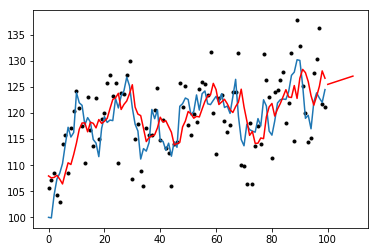

In [9]:
# fit 
fit = Holt(x).fit()
xhat = fit.fittedvalues

# forecast, too!
xhat = fit.fittedvalues
l = 10 # how far out to forecast
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

# Holt-Winters: Add seasonality, too!

Let's show how to use the `ExponentialSmoothing` class to control how we fit the level, slope, and seasonality.

In [10]:
ExponentialSmoothing?

In [11]:
# call method with just a timeseries 
# -> fits a model with just a level (no slope or seasonality) 
# -> learns the smoothing_level parameter
model = ExponentialSmoothing(x).fit()
model.params

{'smoothing_level': 0.2736369236287541,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 108.06545943278758,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [12]:
# you can control the smoothing_level parameter yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2)
model.params

{'smoothing_level': 0.2,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 109.40991228662284,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [13]:
# can also add an (additive or multiplicative) trend 
model = ExponentialSmoothing(x, trend='add').fit()
model.params

{'smoothing_level': 0.24667364419635715,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 107.76597918050425,
 'initial_slope': 0.17555760581436133,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [14]:
# you can control the smoothing_level and smoothing_slope parameters yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2,smoothing_slope=.5) 
model.params

{'smoothing_level': 0.2,
 'smoothing_slope': 0.5,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 109.40991228662284,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [15]:
# can add a trend and seasonality
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12).fit()
model.params

{'smoothing_level': 0.29578538888073064,
 'smoothing_slope': 3.682190041132058e-12,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 119.36049883572493,
 'initial_slope': 0.20093326283521634,
 'initial_seasons': array([0.90363206, 0.8851291 , 0.90082562, 0.89958761, 0.87486041,
        0.93634587, 0.90447035, 0.89823703, 0.89377713, 0.88244686,
        0.89444216, 0.90538379]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [16]:
# can control parameters explicitly
# -> can control some parameters and optimize over others
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12)
model.fit(smoothing_seasonal=.5)
model.params

{'smoothing_level': 0.20223474921005488,
 'smoothing_slope': 6.588887651219745e-10,
 'smoothing_seasonal': 0.5,
 'damping_slope': nan,
 'initial_level': 119.3604001431938,
 'initial_slope': 0.16841445419783585,
 'initial_seasons': array([0.9006993 , 0.87442618, 0.91957578, 0.88143434, 0.85404604,
        0.91104541, 0.87171475, 0.85292393, 0.88770414, 0.908581  ,
        0.93677083, 0.93238557]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Application: predicting level in Lake Huron

In [17]:
huron = pd.read_csv('LakeHuron.csv')
huron.head()

,Unnamed: 0,time,value
0,1,1875,580.38
1,2,1876,581.86
2,3,1877,580.97
3,4,1878,580.80
4,5,1879,579.79


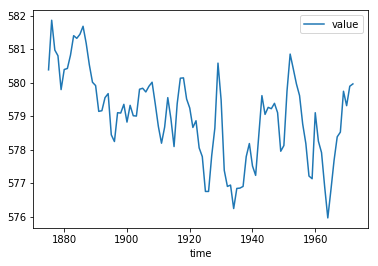

In [18]:
huron.plot('time','value')

In [19]:
# forecast with no trend
model = ExponentialSmoothing(huron['value']).fit()
model.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 580.38,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

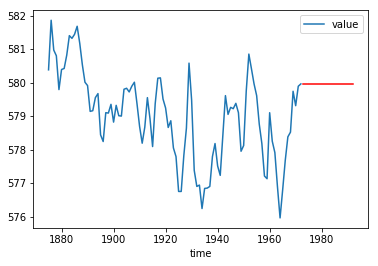

In [20]:
# forecast using this model
lookahead = 20
forecast = model.forecast(lookahead)

# plot the forecast
last_obs = int(huron['time'].tail(1)) # last observed year
huron.plot('time','value')
# plt.plot(huron['time'], model.fittedvalues, color='red')
plt.plot(range(last_obs+1, last_obs+lookahead+1), model.forecast(lookahead), 'r')

In [21]:
# forecast; allow a trend
# the following two lines of code are equivalent
model = ExponentialSmoothing(huron['value'], trend='add').fit()
model = Holt(huron['value']).fit() 
# statsmodels decides data has no trend: smoothing_slope = 0

# we can also force a trend to be fit
# model = Holt(huron['value']).fit(smoothing_slope=.1) # force a trend
model.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 580.3799998248267,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

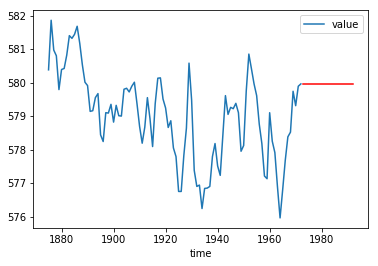

In [22]:
lookahead = 20
forecast = model.forecast(lookahead)

# plot the forecast
last_obs = int(huron['time'].tail(1)) # last observed year
huron.plot('time','value')
# plt.plot(huron['time'], model.fittedvalues, color='red')
plt.plot(range(last_obs+1, last_obs+lookahead+1), forecast, 'r')

# Application: US population

In [23]:
pop = pd.read_csv('uspop.csv')
pop.head()

,Unnamed: 0,time,value
0,1,1790,3.93
1,2,1800,5.31
2,3,1810,7.24
3,4,1820,9.64
4,5,1830,12.90


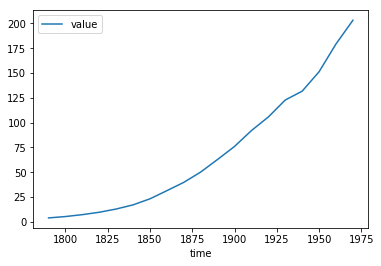

In [24]:
pop.plot('time','value')

In [25]:
model = Holt(pop['value']).fit()
# model = ExponentialSmoothing(pop['value'], trend='add').fit() # equivalent
model.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.7703405838267197,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2.3843186582614804,
 'initial_slope': 1.5456778144420806,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

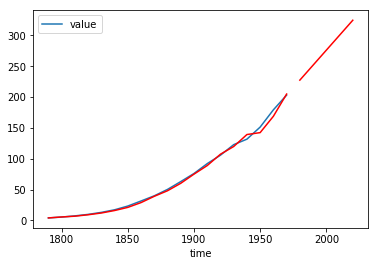

In [26]:
lookahead = 5
forecast = model.forecast(lookahead)

# plot the forecast
last_obs = int(pop['time'].tail(1)) # last observed year
pop.plot('time','value')
plt.plot(pop['time'], model.fittedvalues, color='red')
plt.plot(range(last_obs+10, last_obs+10*lookahead+10,10), forecast, 'r')

In [27]:
# would a multiplicative trend forecast better?
modelmul = ExponentialSmoothing(pop['value'], trend='mul').fit()
modelmul.params

{'smoothing_level': 0.8811960029666472,
 'smoothing_slope': 0.7155590607581965,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2.917382347761453,
 'initial_slope': 1.352363276741316,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

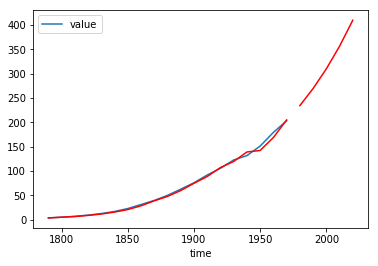

In [28]:
lookahead = 5
forecast = modelmul.forecast(lookahead)

# plot the forecast
last_obs = int(pop['time'].tail(1)) # last observed year
pop.plot('time','value')
plt.plot(pop['time'], model.fittedvalues, color='red')
plt.plot(range(last_obs+10, last_obs+10*lookahead+10,10), forecast, 'r')

Now the curve increases exponentially! 
Interestingly, true behaviour for US pop is somewhere between these two predictions: 2020 population is 330M.

To compare models, we can look at the sum of square errors: sum(forecast - observed value)^2

In [29]:
print("Linear trend model has error", model.sse)
print("Multiplicative trend model has error", modelmul.sse)

Linear trend model has error 299.5536250607256
Multiplicative trend model has error 318.4939358953342


Linear trend model gets slightly lower error.

# Application: predicting co2 levels

In [30]:
co2 = sm.datasets.co2.load()
co2 = pd.DataFrame(co2.data)
co2.head()

,date,co2
0,b'19580329',316.1
1,b'19580405',317.3
2,b'19580412',317.6
3,b'19580419',317.5
4,b'19580426',316.4


In [31]:
# let's tell pandas that the first column consists of datetimes
dates = [pd.to_datetime(int(d), format = '%Y%m%d') for d in co2['date']]
co2['date'] = dates

co2.head()

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


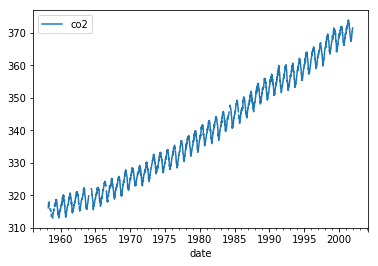

In [32]:
co2.plot('date','co2')

In [33]:
# let's resample the data on a monthly basis
# to do this, we need the data to be indexed by datetime
co2.index = dates
co2monthly = co2.resample('M').ffill()

# change index back to integers when we're done
co2monthly.index = range(1,len(co2monthly.index)+1) 
co2monthly.head()

,date,co2
1,1958-03-29,316.1
2,1958-04-26,316.4
3,1958-05-31,NaN
4,1958-06-28,NaN
5,1958-07-26,315.5


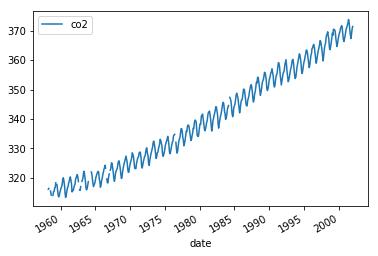

In [34]:
co2monthly.plot('date','co2')

In [35]:
# drop rows with missing values
rows_to_keep = 200
co2monthly = co2monthly.tail(rows_to_keep)
co2monthly.index = range(1,rows_to_keep+1)
co2monthly.head()

,date,co2
1,1985-05-25,348.1
2,1985-06-29,347.4
3,1985-07-27,345.7
4,1985-08-31,343.7
5,1985-09-28,342.1


In [36]:
# no trend
# model = SimpleExpSmoothing(co2monthly['co2']).fit()

# no seasonality
# model = Holt(co2monthly['co2']).fit()

# trend + seasonality
model = ExponentialSmoothing(co2monthly['co2'],trend='add',seasonal='add',seasonal_periods=12).fit()

model.params

{'smoothing_level': 0.43001974405049737,
 'smoothing_slope': 1.4593434954007951e-12,
 'smoothing_seasonal': 3.81017634250384e-11,
 'damping_slope': nan,
 'initial_level': 360.1934122015288,
 'initial_slope': 0.1333460622862391,
 'initial_seasons': array([-11.98324929, -13.16968164, -15.13257672, -17.38356588,
        -18.7521331 , -17.99729668, -16.57174583, -15.35811838,
        -14.64720311, -13.96187078, -12.95784758, -12.09737685]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In the full seasonal model, smoothing_level and smoothing_seasonal are very small. In other words, we want to average over *all* the data to estimate the seasonal component and slope: the statistics of the time series are changing very slowly with time

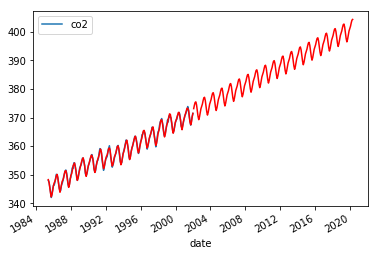

In [37]:
# plot values and fitted values
co2monthly.plot('date','co2')
plt.plot(co2monthly['date'], model.fittedvalues, color='red')

# plot forecast
lookahead = 220 # use 220 to get to 2020
future = 2002
future_dates = pd.date_range(start='2001-12-29', periods=lookahead+1, freq='M')[1:]
plt.plot(future_dates, model.forecast(lookahead), 'r')

daily CO2 today (April 2020): around 415ppm. Not a bad prediction!

# Application: Airline passengers

In [38]:
air = pd.read_csv('AirPassengers.csv')
air.head(12)

,Unnamed: 0,time,value
0,1,1949.000000,112
1,2,1949.083333,118
2,3,1949.166667,132
3,4,1949.250000,129
4,5,1949.333333,121
5,6,1949.416667,135
6,7,1949.500000,148
7,8,1949.583333,148
8,9,1949.666667,136
9,10,1949.750000,119


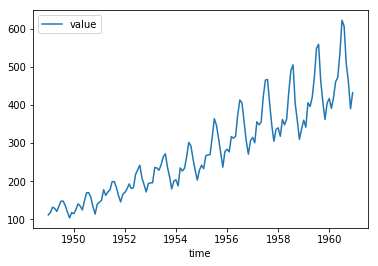

In [39]:
air.plot('time','value')

Mean square error: 109.75901464934567


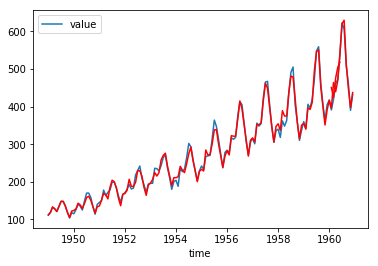

In [40]:
# try modeling with additive vs multiplicative trend and seasonality
model = ExponentialSmoothing(air['value'], trend='mul', seasonal='mul', \
                             seasonal_periods=12).fit()
print("Mean square error:", model.sse / len(air.index))

lookahead = 5
forecast = model.forecast(lookahead)

# plot the forecast
last_obs = int(air['time'].tail(1)) # last observed year
air.plot('time','value')
plt.plot(air['time'], model.fittedvalues, color='red')
plt.plot((np.array(range(lookahead))+1)/12+last_obs, forecast, 'r')

In [41]:
# formally we could check all 4 options:
for trend in ['add', 'mul']:
    for seasonal in ['add', 'mul']:
        model = ExponentialSmoothing(air['value'], \
                                     trend=trend, \
                                     seasonal=seasonal, \
                                     seasonal_periods=12).fit()
        print("Mean square error (trend="+trend+", seasonal="+seasonal+"):", \
              model.sse / len(air.index))

Mean square error (trend=add, seasonal=add): 155.04359196416354
Mean square error (trend=add, seasonal=mul): 110.78389279102792
Mean square error (trend=mul, seasonal=add): 184.62431442903733
Mean square error (trend=mul, seasonal=mul): 109.75901464934567


* model with multiplicative trend and seasonality achieves lowest error
* check residual autocorrelations of each model: in a good model, residuals should be uncorrelated

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.15537924,  0.080683  , -0.05104896, -0.09042404, -0.02280743,
         0.00532315, -0.15015043, -0.04928363,  0.12219221,  0.23308217,
         1.        ,  0.23308217,  0.12219221, -0.04928363, -0.15015043,
         0.00532315, -0.02280743, -0.09042404, -0.05104896,  0.080683  ,
        -0.15537924]),
 <matplotlib.lines.Line2D at 0x1c22c82d30>)

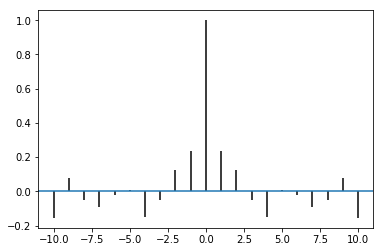

In [42]:
model = ExponentialSmoothing(air['value'], trend='mul', seasonal='mul', \
                             seasonal_periods=12).fit()
plt.acorr(model.resid)

Autocorrelations are smallest for mul,mul model. (But still not perfect...)

# Application: predicting sales

Stove Top makes food products that tend to be used around holidays (e.g., Thanksgiving, Christmas, Easter)
* three years of monthly data starting Apr 2000 
* strong seasonality

In [63]:
sales = pd.read_csv("SalesAndForecastsTimeSeries.csv")
sales.head()

,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut
0,1,285210,4,2000,14268,8793.0,NaN
1,2,285280,4,2000,2321,NaN,NaN
2,3,285330,4,2000,13244,8610.0,NaN
3,4,285430,4,2000,2014,3808.0,NaN
4,5,285440,4,2000,1416,3098.0,NaN


In [71]:
# add a datetime column, for nicer plotting
df = pd.DataFrame()
df['year'] = sales['Year']
df['month'] = sales['MonthNumber']
df['day'] = 1
dates = pd.to_datetime(df)
sales['date'] = dates
sales.head()

,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date
0,1,285210,4,2000,14268,8793.0,NaN,2000-04-01
1,2,285280,4,2000,2321,NaN,NaN,2000-04-01
2,3,285330,4,2000,13244,8610.0,NaN,2000-04-01
3,4,285430,4,2000,2014,3808.0,NaN,2000-04-01
4,5,285440,4,2000,1416,3098.0,NaN,2000-04-01


## plot the data

In [93]:
# select rows corresponding to a single part number
part = 285430  # clear seasonality
# part = 285280 # no clear seasonality
df = sales.loc[sales['PartNumber']==part]
# add an integer index - needed for forecast so python knows rows are ordered
df.index = range(len(df.index)) 
df.head()

,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date
0,4,285430,4,2000,2014,3808.0,NaN,2000-04-01
1,21,285430,5,2000,3992,6420.0,NaN,2000-05-01
2,38,285430,6,2000,6946,3838.0,NaN,2000-06-01
3,55,285430,7,2000,3438,4890.0,NaN,2000-07-01
4,72,285430,8,2000,6110,25066.0,NaN,2000-08-01


Text(0.5, 1.0, 'Sales for part #285280')

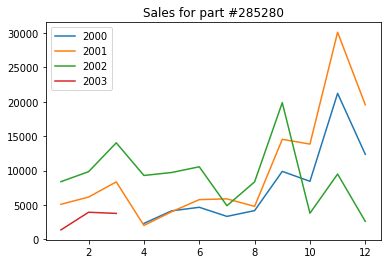

In [83]:
# plot sales over time
years = set(df['Year'])
for year in years:
    # select rows corresponding to given year
    dfyear = df.loc[df['Year']==year]
    # plot sales during that year
    plt.plot(dfyear['MonthNumber'], dfyear['Sales'], label=year)
plt.legend()
plt.title("Sales for part #"+str(part))

In [91]:
# forecast sales
model = ExponentialSmoothing(df['Sales'], trend="add", \
                             seasonal="add", seasonal_periods=12).fit()
model.params

{'smoothing_level': 0.9999999965902436,
 'smoothing_slope': 0.0497863309827864,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 4528.511167808895,
 'initial_slope': 279.9326351493662,
 'initial_seasons': array([-1973.57872931,  -719.26543904,   623.97585252, -1615.74286307,
        -1410.80709666,  8033.87856003,  2722.74892727, 16221.49060708,
         7606.51190735,   574.96658902,  1866.08790038,  3675.55606091]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

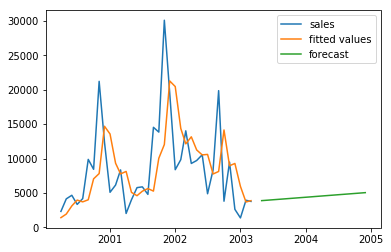

In [87]:
plt.plot(df['date'], df['Sales'], label='sales')
plt.plot(df['date'], model.fittedvalues, label='fitted values')

lookahead = 20 
lastmonth = df['date'].iloc[-1]
future_dates = pd.date_range(start=lastmonth, periods=lookahead+1, freq='M')[1:]
plt.plot(future_dates, model.forecast(lookahead), label='forecast')
plt.legend()

# Prediction intervals for forecasts

In [49]:
# generate synthetic data 
np.random.seed(0)
n = 100
a = np.zeros(n)
b = np.zeros(n)
a[0] = 100 # initial level
b[0] = -1 # initial trend

for i in range(1,n):
    b[i] = b[i-1] + 0.2*randn()      # trend changes slowly
    a[i] = a[i-1] + b[i-1] + 3*randn() # level moves with the trend + extra random movement

# We observe the level + extra noise
x = a + 5*randn(n) 

# fit the model
# fit = Holt(x).fit(smoothing_level=0.1,smoothing_slope=.1,optimized=False)
fit = Holt(x).fit() # optimize over the parameters
xhat = fit.fittedvalues
forecast = fit.forecast(10)

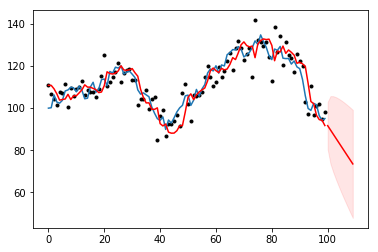

In [50]:
# these prediction intervals are approximate
# 
# for more correct, use https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.exponential_smoothing.ExponentialSmoothing.html#statsmodels.tsa.statespace.exponential_smoothing.ExponentialSmoothing

# error estimate involves the standard error of the noise in the observations
# and an estimate of how much the level changes (randomly) with time
se = np.sqrt(fit.sse / len(x)) # standard error of predictions
level_se = np.std(np.diff(xhat)) # how quickly model predictions change
conf_level = .1
l = len(forecast)
ub = forecast + norm.ppf(conf_level/2)*(se + level_se*np.sqrt(np.arange(l)))
lb = forecast + norm.ppf(1-conf_level/2)*(se + level_se*np.sqrt(np.arange(l)))

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')
plt.fill_between(range(n,n+l), lb, ub, color='r', alpha=.1)

# Regression for forecasting

advantages: 
* can use any covariates you want!
* can use standard regression tools to select model, assess significance, build confidence/prediction intervals, etc

disadvantages: more complicated (beyond this class) to
* update model given new (future) observations
* discount observations from the distant past

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices 

In [113]:
df
df['time'] = df['Year'] - 2000 + df['MonthNumber']/12
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date,time
0,4,285430,4,2000,2014,3808.0,NaN,2000-04-01,0.333333
1,21,285430,5,2000,3992,6420.0,NaN,2000-05-01,0.416667
2,38,285430,6,2000,6946,3838.0,NaN,2000-06-01,0.500000
3,55,285430,7,2000,3438,4890.0,NaN,2000-07-01,0.583333
4,72,285430,8,2000,6110,25066.0,NaN,2000-08-01,0.666667


We'll use the `C` function to tell statsmodels that the `MonthNumber` is a categorical variable. That tells it to fit a separate offset for each value of the month. Equivalently, we are adding a new binary covariate for each month: the covariate for November for the ith observation, for example, is 1 if observation i's month is November and 0 otherwise.

In [114]:
# form the design matrix and target

# trend
Y, X = dmatrices("Sales ~ time", data=df, return_type='dataframe')

# just seasonality
Y, X = dmatrices("Sales ~ C(MonthNumber)", data=df, return_type='dataframe')

# trend and seasonality
# Y, X = dmatrices("Sales ~ time + C(MonthNumber)", data=df, return_type='dataframe')

X.head()

,Intercept,C(MonthNumber)[T.2],C(MonthNumber)[T.3],C(MonthNumber)[T.4],C(MonthNumber)[T.5],C(MonthNumber)[T.6],C(MonthNumber)[T.7],C(MonthNumber)[T.8],C(MonthNumber)[T.9],C(MonthNumber)[T.10],C(MonthNumber)[T.11],C(MonthNumber)[T.12]
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Instead of forming the design matrix in one step, and fitting the model in the next, we can fit a model directly from the formula using the statsmodels formula API.

In [115]:
# just trend 
model = smf.ols(formula="Sales ~ time", data=df).fit()

# just seasonality 
model = smf.ols(formula="Sales ~ C(MonthNumber)", data=df).fit()

# trend + seasonality
model = smf.ols(formula="Sales ~ time + C(MonthNumber)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     14.01
Date:                Tue, 05 May 2020   Prob (F-statistic):           7.70e-08
Time:                        11:11:18   Log-Likelihood:                -346.04
No. Observations:                  36   AIC:                             718.1
Df Residuals:                      23   BIC:                             738.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3396.0208   3244.832     -1.047      0.306   -1.01e+04    3316.425
C(MonthNumber)[T.2]   1541.8125   3695.591      0.417      0.680   -6103.101    9186.726
C(MonthNumber)[T.3]   1.149e+04   3697.995      3.107      0.005    3840.405    1.91e+04
C(MonthNumber)[T.4]   1.197e+04   3759.176      3.184      0.004    4192.573    1.97e+04
C(MonthNumber)[T.5]   5563.5000   3745.755      1.485      0.151   -2185.184    1.33e+04
C(MonthNumber)[T.6]   7136.6458   3733.872      1.911      0.069    -587.457    1.49e+04
C(MonthNumber)[T.7]   4245.1250   3723.543      1.140      0.266   -3457.611    1.19e+04
C(MonthNumber)[T.8]   6800.2708   3714.781      1.831      0.080    -884.339    1.45e+04
C(MonthNumber)[T.9]   3.312e+04   3707.596      8.932      0.000    2.54e+04    4.08e+04
C(MonthNumber)[T.10]  1.611e+04   3701.999      4.351      0.000    8448.394    2.38e+04
C(MonthNumber)[T.11]  2.096e+04   3697.995      5.669      0.000    1.33e+04    2.86e+04
C(MonthNumber)[T.12]   2.36e+04   3695.591      6.386      0.000     1.6e+04    3.12e+04
time                  2538.2500    923.697      2.748      0.011     627.436    4449.064
==============================================================================
Omnibus:                        2.765   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                1.721
Skew:                          -0.173   Prob(JB):                        0.423
Kurtosis:                       4.014   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for time is positive; it indicates that sales rise by about $2000 each month, on average, controlling for seasonality.

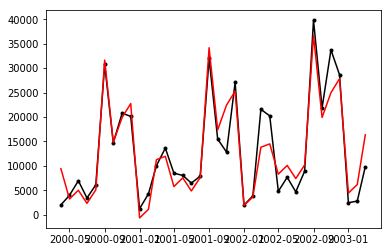

In [112]:
# plot forecasts 
# plt.scatter(df['date'], df['Sales'], marker='.', color='black')
plt.plot(df['date'], df['Sales'], marker='.', color='black')
plt.plot(df['date'], model.fittedvalues, color='r')

In [117]:
lagged_sales = [np.nan] + list(df['Sales'][:-1])
df['lagged_sales'] = lagged_sales
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date,time,lagged_sales
0,4,285430,4,2000,2014,3808.0,NaN,2000-04-01,0.333333,NaN
1,21,285430,5,2000,3992,6420.0,NaN,2000-05-01,0.416667,2014.0
2,38,285430,6,2000,6946,3838.0,NaN,2000-06-01,0.500000,3992.0
3,55,285430,7,2000,3438,4890.0,NaN,2000-07-01,0.583333,6946.0
4,72,285430,8,2000,6110,25066.0,NaN,2000-08-01,0.666667,3438.0


In [118]:
# drop the first observation, since lagged sale is unobserved 
dflagged = df.loc[1:]
dflagged.head()

,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date,time,lagged_sales
1,21,285430,5,2000,3992,6420.0,NaN,2000-05-01,0.416667,2014.0
2,38,285430,6,2000,6946,3838.0,NaN,2000-06-01,0.500000,3992.0
3,55,285430,7,2000,3438,4890.0,NaN,2000-07-01,0.583333,6946.0
4,72,285430,8,2000,6110,25066.0,NaN,2000-08-01,0.666667,3438.0
5,89,285430,9,2000,30734,NaN,NaN,2000-09-01,0.750000,6110.0


In [119]:
model_lagged = smf.ols(formula="Sales ~ time + C(MonthNumber) + lagged_sales", data=dflagged).fit()
model_lagged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     15.08
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.22e-08
Time:                        11:18:47   Log-Likelihood:                -332.54
No. Observations:                  35   AIC:                             693.1
Df Residuals:                      21   BIC:                             714.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6237.4067   4998.212     -1.248      0.226   -1.66e+04    4156.944
C(MonthNumber)[T.2]   6375.7082   5989.215      1.065      0.299   -6079.547    1.88e+04
C(MonthNumber)[T.3]   1.606e+04   5735.775      2.800      0.011    4131.848     2.8e+04
C(MonthNumber)[T.4]   1.732e+04   4231.650      4.093      0.001    8518.893    2.61e+04
C(MonthNumber)[T.5]   7533.8793   4190.701      1.798      0.087   -1181.160    1.62e+04
C(MonthNumber)[T.6]   1.045e+04   5061.217      2.066      0.051     -70.972     2.1e+04
C(MonthNumber)[T.7]   7292.3890   4824.752      1.511      0.146   -2741.233    1.73e+04
C(MonthNumber)[T.8]   1.048e+04   5264.556      1.991      0.060    -465.880    2.14e+04
C(MonthNumber)[T.9]   3.633e+04   4873.796      7.454      0.000    2.62e+04    4.65e+04
C(MonthNumber)[T.10]  1.403e+04   3963.312      3.540      0.002    5788.913    2.23e+04
C(MonthNumber)[T.11]  2.238e+04   3748.317      5.972      0.000    1.46e+04    3.02e+04
C(MonthNumber)[T.12]  2.409e+04   3455.346      6.971      0.000    1.69e+04    3.13e+04
time                  1441.5606   1076.814      1.339      0.195    -797.798    3680.919
lagged_sales             0.2028      0.208      0.974      0.341      -0.230       0.636
==============================================================================
Omnibus:                        5.287   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.761
Skew:                           0.195   Prob(JB):                       0.0561
Kurtosis:                       4.949   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

notice that 
* model fit improves
* effect of trend and seasons changes: eg, coefficient for trend is now lower ($1400/year) with lower p value

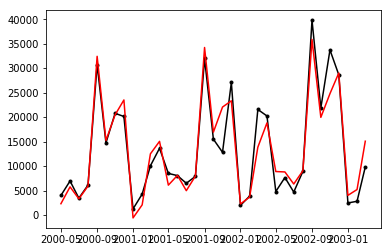

In [120]:
plt.plot(dflagged['date'], dflagged['Sales'], marker='.', color='black')
plt.plot(dflagged['date'], model_lagged.fittedvalues, color='r')

In [121]:
# can add as many lagged outcomes as you'd like!
lmax = 3
for lag in range(1,lmax+1):
    df['lagged_sales'+str(lag)] = [np.nan]*lag + list(df['Sales'][:-lag])

dflagged = df.loc[lag:]
dflagged.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,PartNumber,MonthNumber,Year,Sales,ForecastSalesNextMonth,ForecastTwoMonthsOut,date,time,lagged_sales,lagged_sales1,lagged_sales2,lagged_sales3
3,55,285430,7,2000,3438,4890.0,NaN,2000-07-01,0.583333,6946.0,6946.0,3992.0,2014.0
4,72,285430,8,2000,6110,25066.0,NaN,2000-08-01,0.666667,3438.0,3438.0,6946.0,3992.0
5,89,285430,9,2000,30734,NaN,NaN,2000-09-01,0.750000,6110.0,6110.0,3438.0,6946.0
6,106,285430,10,2000,14738,NaN,NaN,2000-10-01,0.833333,30734.0,30734.0,6110.0,3438.0
7,123,285430,11,2000,20766,NaN,NaN,2000-11-01,0.916667,14738.0,14738.0,30734.0,6110.0


In [122]:
formula = "Sales ~ time + C(MonthNumber) + lagged_sales1 + lagged_sales2 + lagged_sales3"
model_llags = smf.ols(formula=formula, data=dflagged).fit()
model_llags.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     10.73
Date:                Tue, 05 May 2020   Prob (F-statistic):           7.05e-06
Time:                        11:22:26   Log-Likelihood:                -313.70
No. Observations:                  33   AIC:                             659.4
Df Residuals:                      17   BIC:                             683.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5236.5598   7536.443     -0.695      0.497   -2.11e+04    1.07e+04
C(MonthNumber)[T.2]   8098.5451   7202.451      1.124      0.276   -7097.299    2.33e+04
C(MonthNumber)[T.3]   1.712e+04   8236.001      2.078      0.053    -259.679    3.45e+04
C(MonthNumber)[T.4]   1.473e+04   7197.506      2.046      0.057    -458.258    2.99e+04
C(MonthNumber)[T.5]   4849.6842   5735.396      0.846      0.410   -7250.943     1.7e+04
C(MonthNumber)[T.6]   1.017e+04   6306.049      1.613      0.125   -3132.913    2.35e+04
C(MonthNumber)[T.7]   6846.9345   6580.330      1.041      0.313   -7036.349    2.07e+04
C(MonthNumber)[T.8]   9211.7542   7292.200      1.263      0.224   -6173.443    2.46e+04
C(MonthNumber)[T.9]   3.505e+04   7078.331      4.952      0.000    2.01e+04       5e+04
C(MonthNumber)[T.10]  1.137e+04   6348.473      1.792      0.091   -2020.458    2.48e+04
C(MonthNumber)[T.11]  2.183e+04   6151.236      3.548      0.002    8848.870    3.48e+04
C(MonthNumber)[T.12]   2.66e+04   5715.529      4.653      0.000    1.45e+04    3.87e+04
time                  2202.2761   1595.767      1.380      0.185   -1164.497    5569.049
lagged_sales1            0.2413      0.258      0.934      0.364      -0.304       0.786
lagged_sales2           -0.0413      0.264     -0.157      0.877      -0.599       0.516
lagged_sales3           -0.1516      0.240     -0.631      0.536      -0.658       0.355
==============================================================================
Omnibus:                        4.999   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.068
Skew:                           0.181   Prob(JB):                       0.0793
Kurtosis:                       4.885   Cond. No.                     6.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

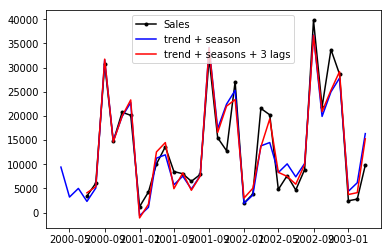

In [123]:
plt.plot(dflagged['date'], dflagged['Sales'], marker='.', color='black')
plt.plot(df['date'], model.fittedvalues, color='b', label='trend + season')
plt.plot(dflagged['date'], model_llags.fittedvalues, color='r', label='trend + seasons + 3 lags')
plt.legend()